In [19]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
frame = sns.load_dataset('Penguins')
df = frame.dropna()
print("Dataset has been loaded successfully: \n")

X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=121)
y_test = pd.Series(y_test.values, dtype='str', index=X_test.index)  # Rebuild as plain string Series

y_train = y_train.astype(str).reset_index(drop=True)
y_test = y_test.astype(str).reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


Dataset has been loaded successfully: 

(166, 4) (166,) (167, 4) (167,)


In [21]:
parameters = [
    {
        'estimator' : [DecisionTreeClassifier()],
        'estimator__max_depth' : [3, 5, 10, None],
        'estimator__min_samples_split' : [2, 5, 10, 20]
    },
    {
        'estimator' : [RandomForestClassifier()],
        'estimator__n_estimators' : [50, 100, 200],
        'estimator__max_features' : ['sqrt', None]
    },
    {
        'estimator' : [KNeighborsClassifier()],
        'estimator__n_neighbors' : [3, 5, 7, 9],
        'estimator__weights' : ['uniform', 'distance']
    }
]

pipe = Pipeline([
    ('scaler', StandardScaler()),           # KNN needs scaling, others ignore it safely
    ('estimator', DecisionTreeClassifier())       # dummy starter, will be replaced
])
grid = GridSearchCV(
    estimator = pipe,
    # estimator=DecisionTreeClassifier(),
    # estimator=None,
    param_grid = parameters,
    cv = 5,
    scoring = 'accuracy',
    # n_jobs=-1,
    refit = True

)
# grid = GridSearchCV(pipe, parameters, cv=5, scoring='accuracy', n_jobs=-1, refit=True, error_score='raise')
grid.fit(X_train, y_train)
print("Model has been trained!")
print("Model has been predicted!", grid.predict(X_test))

Model has been trained!
Model has been predicted! ['Gentoo' 'Gentoo' 'Gentoo' 'Chinstrap' 'Chinstrap' 'Gentoo' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo'
 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Gentoo' 'Chinstrap' 'Adelie'
 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Gentoo' 'Chinstrap' 'Chinstrap' 'Adelie' 'Adelie'
 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Gentoo'
 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo'
 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Chinstrap'
 'Chinstrap' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Chinstrap' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo'
 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Chinstra

In [22]:
grid.best_estimator_.fit(X_train, y_train)        #training our best model
print("Best score is : ", grid.best_score_)
print("Best parameter is :", grid.best_params_)
print("Best model is: ", grid.best_estimator_)

Best score is :  0.982174688057041
Best parameter is : {'estimator': KNeighborsClassifier(), 'estimator__n_neighbors': 3, 'estimator__weights': 'uniform'}
Best model is:  Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])


In [23]:
import joblib
joblib.dump(grid.best_estimator_, 'Best_model_penguin.pkl')

['Best_model_penguin.pkl']

In [24]:
# a = float(input("Enter bill length (mm): "))
# b = float(input("Enter bill depth (mm): "))
# c = float(input("Enter flipper length (mm): "))
# d = float(input("Enter body mass (g): "))

# u_val = [[a, b, c, d]]
load_model = joblib.load('Best_model_penguin.pkl')
# print(f"Predicted answer by best model {grid.best_estimator_} is: ", load_model.predict(u_val)[0])


In [25]:

saved_model = joblib.load('Best_model_Penguin.pkl')
print("File as been loaded! ", saved_model)
pred = load_model.predict(X_test)
# FORCE BOTH TO BE IDENTICAL TYPE — END OF STORY
y_test = y_test.astype(str).values.ravel()
pred   = pred.astype(str).ravel()

print("y_test dtype:", y_test.dtype)   # should say object
print("pred dtype:  ", pred.dtype)     # should say object
print("Are they same type?", y_test.dtype == pred.dtype)  # MUST be True


File as been loaded!  Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])
y_test dtype: object
pred dtype:   <U9
Are they same type? False


[[58  0  0]
 [ 0  0  0]
 [ 0  0 71]]


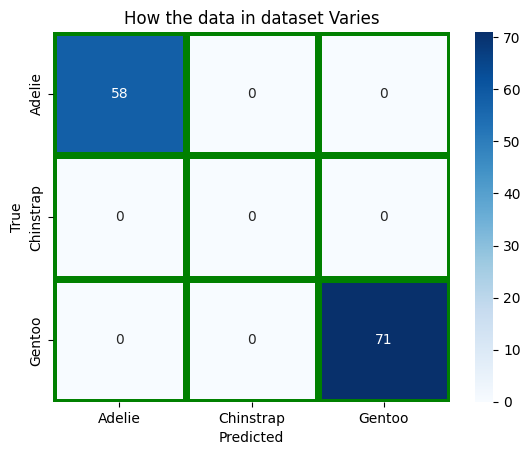

Total mismatches found by direct comparison : 5
Total off-diagonal elements in matrix      : 0


In [36]:
cm = confusion_matrix(y_test, pred, labels=['Adelie','Chinstarp','Gentoo'])
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Adelie','Chinstrap','Gentoo'],
            yticklabels=['Adelie','Chinstrap','Gentoo'],
            linecolor='green',
            linewidths=5)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("How the data in dataset Varies")
plt.show()

# THE ULTIMATE SANITY CHECK — never skip again
print("Total mismatches found by direct comparison :", (y_test != pred).sum())
print("Total off-diagonal elements in matrix      :", cm.sum() - cm.trace())

In [37]:
mask = y_test != pred
mistakes = X_test[mask].copy()
mistakes['true_specie'] = y_test[mask]
mistakes['predicted_specie'] = pred[mask]
print(mistakes)
# print(df[mistakes])

display(X_test[(y_test == 'Chinstrap') & (pred == 'Adelie')].reset_index(drop=False))

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
55             43.5           18.1              202.0       3400.0   
72             46.1           18.2              178.0       3250.0   
76             40.9           16.6              187.0       3200.0   
87             42.4           17.3              181.0       3600.0   
141            42.5           17.3              187.0       3350.0   

    true_specie predicted_specie  
55    Chinstrap           Adelie  
72    Chinstrap           Adelie  
76    Chinstrap           Adelie  
87    Chinstrap           Adelie  
141   Chinstrap           Adelie  


,index,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,55,43.5,18.1,202.0,3400.0
1,72,46.1,18.2,178.0,3250.0
2,76,40.9,16.6,187.0,3200.0
3,87,42.4,17.3,181.0,3600.0
4,141,42.5,17.3,187.0,3350.0


In [38]:
# mask = (y_test.astype(str).values != np.array(pred, dtype=str))
# mask = y_test.ne(pred).values

# mask = y_test != pred
# mistakes = X_test[mask].copy()
# mistakes['true_specie'] = y_test[mask]
# mistakes['predicted_specie'] = pred[mask.values]
# print(mistakes)

# print(df[mistakes])
# print(y_test)
# print(pred)
# print(y.dtype)

In [39]:
# temp = pd.DataFrame({'true': y_test, 'predicted': pred}, index=y_test.index)
# w_id = temp[temp['true'] != temp['predicted']].index
# mistakes = X_test.loc[w_id].copy()
# mistakes['true'] = temp.loc[w_id, 'true']
# mistakes['predicted'] = temp.loc[w_id, 'predicted']
# print(mistakes)

In [40]:
# mist = X_test.copy()
# mist['true'] = y_test.astype(str)
# mist['predicted'] = pred.astype(str)
# mist = mist[mist['true'] != mist['predicted']]
# print(mist)

In [41]:
# import numpy as np
# import pandas as pd

# # Force everything to pure positional NumPy arrays — pandas can't interfere
# y_true_pos = np.array(y_test)                     # shape (167,)
# pred_pos   = pred                                 # shape (167,) — scikit-learn guarantees this

# # Find the exact positions where true = Adelie AND predicted = Gentoo
# positions = np.where((y_true_pos == 'Adelie') & (pred_pos == 'Gentoo'))[0]

# # Show the 5 correct penguins
# mistakes = X_test.iloc[positions].reset_index(drop=True)
# print("Your 5 misclassified Adelie → Gentoo penguins:")
# display(mistakes)

Current confusion matrix from the pred you have now:
[[58  0  0]
 [ 5 33  0]
 [ 0  0 71]]


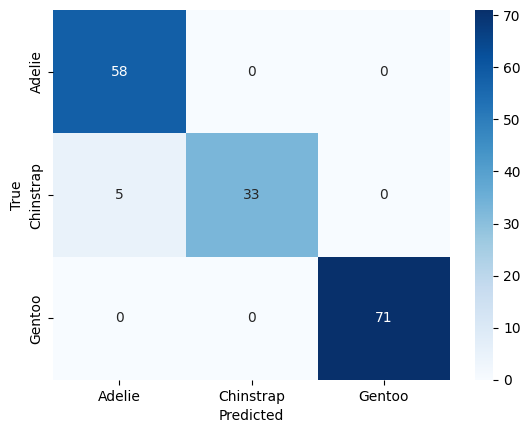

Total mismatches found by direct comparison : 5
Total off-diagonal elements in matrix      : 5


In [42]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# THIS WILL TELL US THE TRUTH
current_cm = confusion_matrix(y_test, pred, labels=['Adelie', 'Chinstrap', 'Gentoo'])
print("Current confusion matrix from the pred you have now:")
print(current_cm)

sns.heatmap(current_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Adelie','Chinstrap','Gentoo'],
            yticklabels=['Adelie','Chinstrap','Gentoo'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

# THE ULTIMATE SANITY CHECK — never skip again
print("Total mismatches found by direct comparison :", (y_test != pred).sum())
print("Total off-diagonal elements in matrix      :", current_cm.sum() - current_cm.trace())

In [43]:
display(X_test[(y_test == 'Chinstrap') & (pred == 'Adelie')].reset_index(drop=False))

,index,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,55,43.5,18.1,202.0,3400.0
1,72,46.1,18.2,178.0,3250.0
2,76,40.9,16.6,187.0,3200.0
3,87,42.4,17.3,181.0,3600.0
4,141,42.5,17.3,187.0,3350.0


In [44]:
# print("y_test length:", len(y_test), "pred length:", len(pred))
# print("y_test sample:", y_test.head(3).tolist())
# print("pred sample:", pred[:3].tolist())

In [45]:
import numpy as np

# This prints the actual memory location of the object
print("pred object identity (first time):", id(pred))
print("pred object identity (second time):", id(pred))

# Then run your first confusion matrix cell
cm1 = confusion_matrix(y_test, pred, labels=['Adelie', 'Chinstrap', 'Gentoo'])
print("First matrix identity check - pred id:", id(pred))

# Then run your second confusion matrix cell
cm2 = confusion_matrix(y_test, pred, labels=['Adelie', 'Chinstrap', 'Gentoo'])
print("Second matrix identity check - pred id:", id(pred))

pred object identity (first time): 2790677473360
pred object identity (second time): 2790677473360
First matrix identity check - pred id: 2790677473360
Second matrix identity check - pred id: 2790677473360
